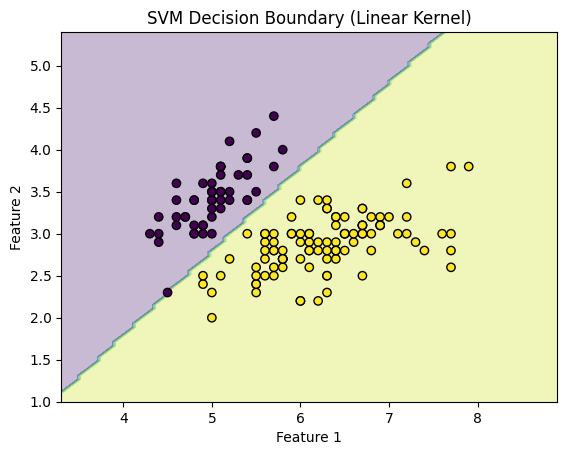

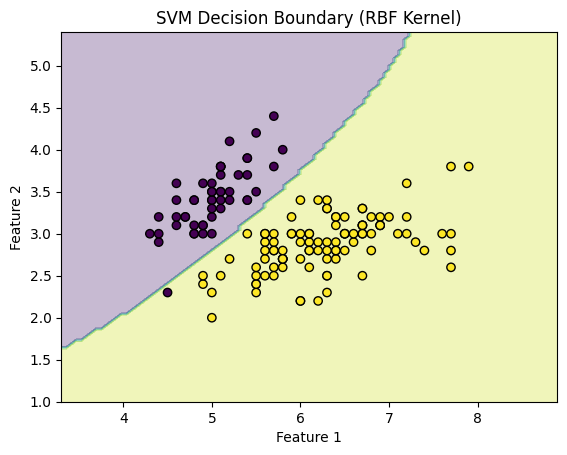

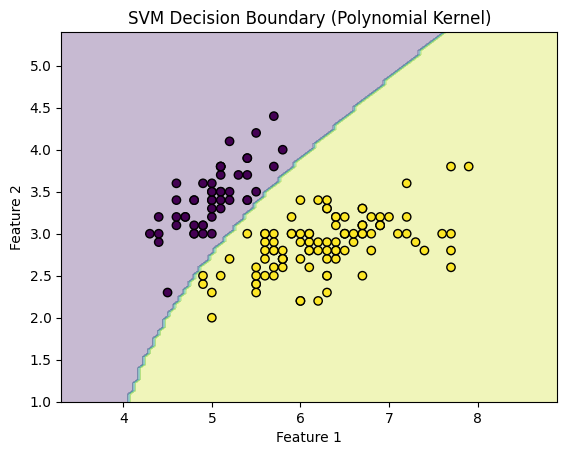

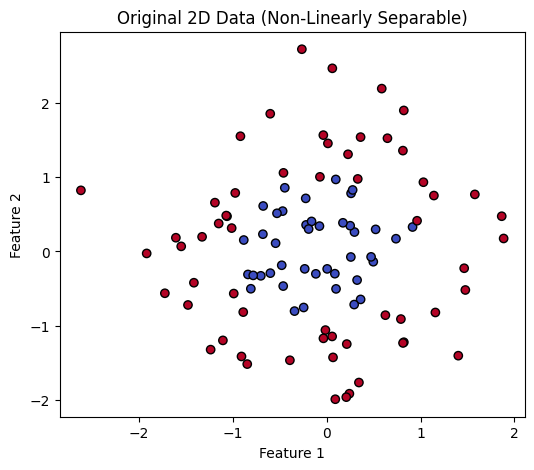

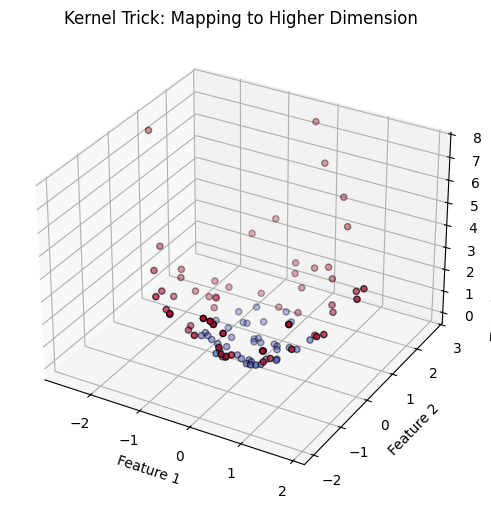

Linear Kernel Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (Iris dataset with only two classes for binary classification)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Taking only first two features for visualization
y = iris.target
y = (y != 0) * 1  # Converting to binary classification (Class 1 vs. Rest)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model with different kernels
svm_linear = SVC(kernel='linear', C=1.0).fit(X_train, y_train)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale').fit(X_train, y_train)
svm_poly = SVC(kernel='poly', degree=3, C=1.0).fit(X_train, y_train)

# Function to visualize decision boundaries
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(X, y, svm_linear, "SVM Decision Boundary (Linear Kernel)")
plot_decision_boundary(X, y, svm_rbf, "SVM Decision Boundary (RBF Kernel)")
plot_decision_boundary(X, y, svm_poly, "SVM Decision Boundary (Polynomial Kernel)")

# Generate Kernel Trick Transformation Diagram
from mpl_toolkits.mplot3d import Axes3D

# Generate sample non-linearly separable data
np.random.seed(42)
X_non_linear = np.random.randn(100, 2)
y_non_linear = (X_non_linear[:, 0]**2 + X_non_linear[:, 1]**2 > 1).astype(int)

# 2D Plot of Original Data
plt.figure(figsize=(6, 5))
plt.scatter(X_non_linear[:, 0], X_non_linear[:, 1], c=y_non_linear, edgecolors='k', cmap='coolwarm')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original 2D Data (Non-Linearly Separable)")
plt.show()

# Apply Kernel Trick: Map to Higher-Dimensional Space
X_transformed = np.c_[X_non_linear[:, 0], X_non_linear[:, 1], X_non_linear[:, 0]**2 + X_non_linear[:, 1]**2]

# 3D Plot to Show Kernel Trick Effect
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=y_non_linear, cmap='coolwarm', edgecolors='k')
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Transformed Feature (x^2 + y^2)")
ax.set_title("Kernel Trick: Mapping to Higher Dimension")
plt.show()

# Evaluate Model Performance
y_pred = svm_linear.predict(X_test)
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
